<a href="https://colab.research.google.com/github/datascience-uniandes/classification_tutorial/blob/master/cancer/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Estimate if a brain tumor is malignant or benign

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
Last update: October, 2023

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [21]:
from joblib import dump



from scipy.stats import ks_2samp
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

### Reading the dataset

In [2]:
# Reading CSV
cancer_df = pd.read_csv("./data/cancer.csv", sep=",")

In [3]:
# Deleting unused column
del cancer_df["Unnamed: 32"]

In [4]:
cancer_df.shape

(569, 32)

In [5]:
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
correlacion = cancer_df.drop(columns=['diagnosis']).corr()

### Splitting train and test datasets

In [10]:
# Selecting features to train the model
features = cancer_df.columns.tolist()[2:]

In [11]:
# Creating feature matrix
X = cancer_df[features]

In [12]:
# Creating target
Y = cancer_df["diagnosis"].replace({"B": 0, "M": 1})

C:\Users\lperd\AppData\Local\Temp\ipykernel_10588\3485837342.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = cancer_df["diagnosis"].replace({"B": 0, "M": 1})


In [13]:
Y.value_counts(normalize = True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [14]:
# Splitting feature matrix for training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=500)

In [15]:
Y_train.value_counts(normalize = True)

diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64

In [16]:
Y_test.value_counts(normalize = True)

diagnosis
0    0.625731
1    0.374269
Name: proportion, dtype: float64

### Training the model

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
# Initializing the model
model = LogisticRegression(penalty="l2", C=0.1, solver="liblinear", class_weight="balanced", random_state=80)

In [20]:
# Training the model using training dataset
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [21]:
pd.DataFrame(np.append(np.array(features).reshape(-1, 1), model.coef_.reshape(-1, 1), axis=1), columns=["feature", "coefficient"])

,feature,coefficient
0,radius_mean,0.3751297373792716
1,texture_mean,0.3774514296607687
2,perimeter_mean,0.359244671137922
3,area_mean,0.366740403227548
4,smoothness_mean,0.1668909968010896
5,compactness_mean,-0.05210889971223939
6,concavity_mean,0.2872299319113865
7,concave points_mean,0.37434280496829353
8,symmetry_mean,-0.013680520912574143
9,fractal_dimension_mean,-0.2285847281576669


<span style="color: red;">Q: How to interpret coefficients in Logistic Regression?</span>

### Evaluating the model

In [22]:
# Predicting for test dataset
predictions = model.predict(scaler.transform(X_test))

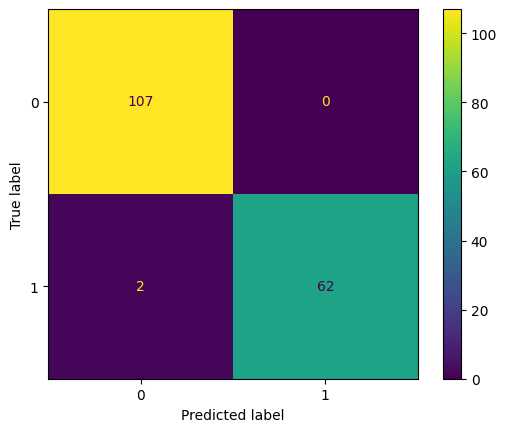

In [23]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

In [24]:
# Calculating confusion matrix derived metrics
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1", f1_score(Y_test, predictions))

Precision: 1.0
Recall: 0.96875
F1 0.9841269841269841


### Analyzing probabilities

In [25]:
probabilities = model.predict_proba(scaler.transform(X_test))[:,1]

In [26]:
probs_true_df = pd.DataFrame(np.append(probabilities.reshape(-1, 1), Y_test.values.reshape(-1, 1), axis=1), columns=["probs", "true"])

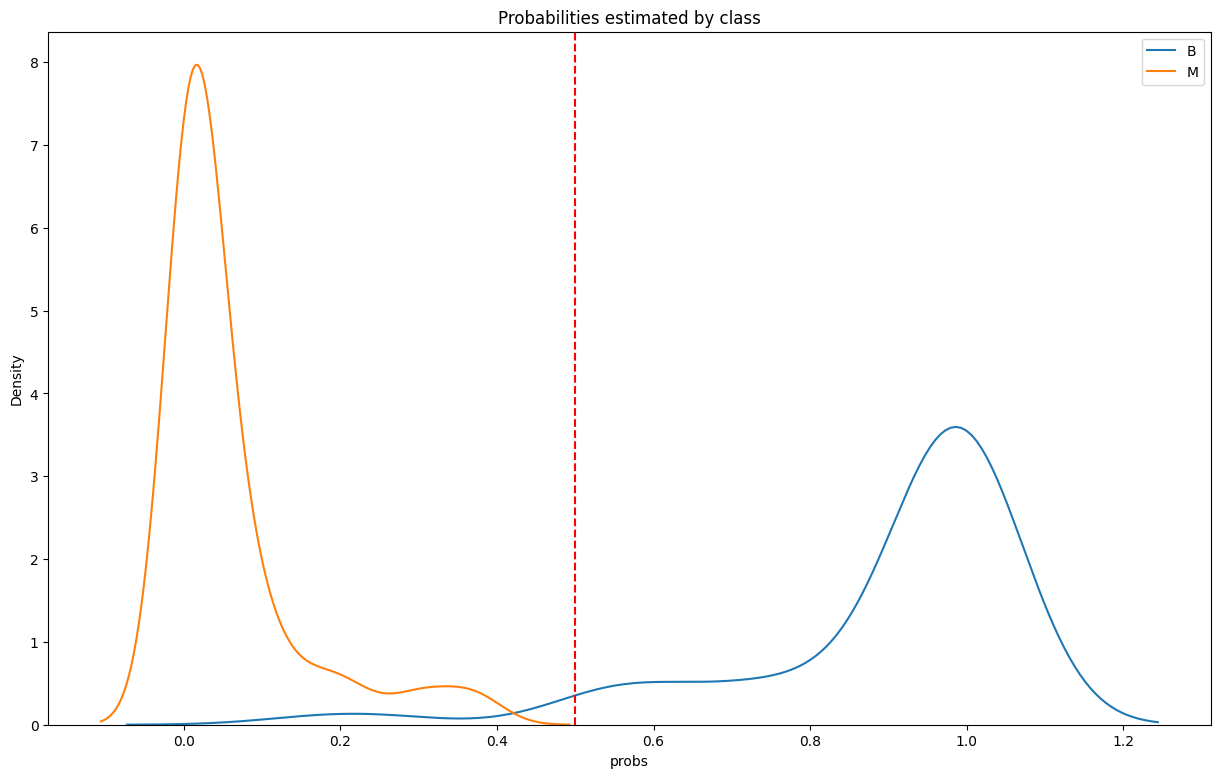

In [27]:
plt.figure(figsize=(15, 9))
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 1], x="probs", label="B")
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 0], x="probs", label="M")
plt.axvline(x=.5, color="r", linestyle="--")
plt.title('Probabilities estimated by class')
plt.legend()
plt.show()

In [10]:
churn_df = pd.read_csv("./data/churn_train_val.csv")
test_df = pd.read_csv("./data/churn_test_labeled.csv")
features = ["age", "balance", "products_number", "active_member"]

In [11]:
# Creating feature matrix
X = churn_df[features]
# Creating target
Y = churn_df["churn"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=500)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Initializing the model
model = LogisticRegression(penalty="l2", C=0.1, solver="liblinear", class_weight="balanced", random_state=80)
# Training the model using training dataset
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [14]:
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [15]:
pd.DataFrame(np.append(np.array(features).reshape(-1, 1), model.coef_.reshape(-1, 1), axis=1), columns=["feature", "coefficient"])

,feature,coefficient
0,age,0.8143364493408182
1,balance,0.3115345064333721
2,products_number,-0.015264636613211416
3,active_member,-0.43021035564663784


In [16]:
predictions = model.predict(scaler.transform(X_test))

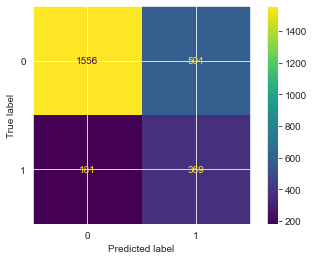

In [17]:
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

In [18]:
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1", f1_score(Y_test, predictions))

Precision: 0.38317757009345793
Recall: 0.6709090909090909
F1 0.48777263714474556


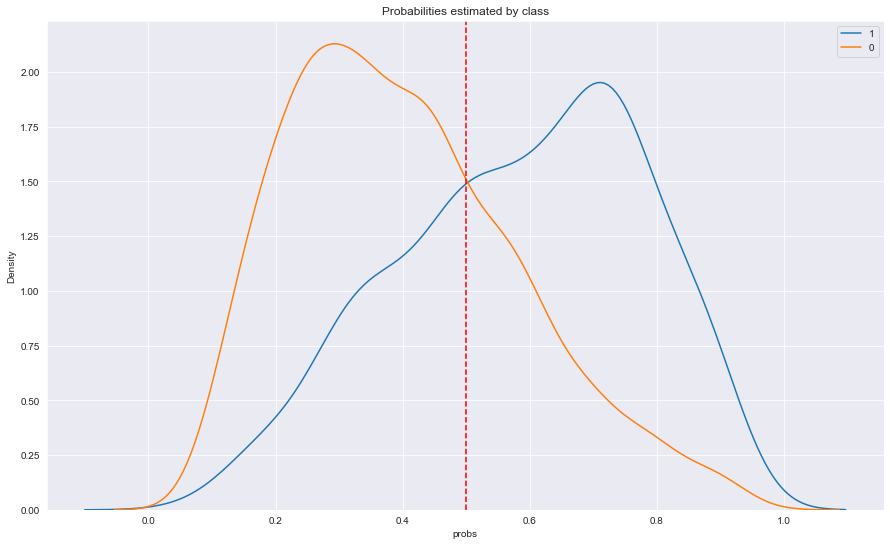

In [20]:
probabilities = model.predict_proba(scaler.transform(X_test))[:, 1]
probs_true_df = pd.DataFrame(np.append(probabilities.reshape(-1, 1), Y_test.values.reshape(-1, 1), axis=1),
                             columns=["probs", "true"])
plt.figure(figsize=(15, 9))
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 1], x="probs", label="1")
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 0], x="probs", label="0")
plt.axvline(x=.5, color="r", linestyle="--")
plt.title('Probabilities estimated by class')
plt.legend()
plt.show()

In [22]:
import sklearn
import imblearn

pipeline_dt = Pipeline([
    ("classifier", DecisionTreeClassifier())
])

param_grid_dt = {
    "classifier__max_depth": [3, 4, 5, 6, 7],
    "classifier__min_samples_leaf": [5, 10, 15],
    "classifier__criterion": ["gini", "entropy", "log_loss"]
}
grid_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt,
                       scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)
grid_dt.fit(churn_df[features], churn_df["churn"])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [5, 10, 15]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

In [24]:
control = grid_dt.best_estimator_
variant = model

xtestA, xtestB, ytestA, ytestB = train_test_split(test_df[features], test_df['churn'],
                                                  test_size=0.5)
ypred_control = control.predict(xtestA)
ypred_variant = variant.predict(xtestB)

acc_control = (ypred_control == ytestA).astype(int)
acc_variante = (ypred_variant == ytestB).astype(int)

print(acc_control.mean())
print(acc_variante.mean())

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=15))])
LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')
0.844
0.166


c:\users\esteban\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
from scipy import stats

t_stat, p_value = stats.ttest_rel(acc_control, acc_variante)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 28.708524998332354, P-value: 9.708666248837141e-108


c:\users\esteban\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


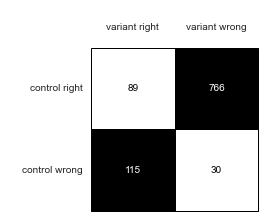

In [26]:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import mcnemar_tables

ypred_control = control.predict(test_df[features])
ypred_variant = variant.predict(test_df[features])

tb = mcnemar_tables(test_df['churn'],
                    ypred_control,
                    ypred_variant)
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['variant right', 'variant wrong'],
                        row_labels=['control right', 'control wrong'])
plt.show()